In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split #from model_selection instead of cross_validation
from sklearn.model_selection import validation_curve #from model_selection instead of learning_curve
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
np.random.seed(42)

# To plot pretty figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

data and DecisionTreeClassifier import

In [38]:
# iris = load_iris()
# X = iris.data
# y = iris.target
# #shuffle data
# X, y = shuffle(X, y, random_state=23)
# #split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/xuwenyihust/Wine-Quality/master/data/winequality-red.csv", sep=';')
column_list = list(df.columns)[0:-1]
#print (df.head())
print (column_list)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [75]:
# #df = pd.read_csv('winequality-red.csv')

# # print (df.head())
# print(df.shape)
# # df.quality.hist(bins = 10)
# X_df = df.iloc[:,:-1]
# X_df.head()
# X = X_df.as_matrix()
# print(X[:3])
# y_df = df["quality"].values

# #df['grade'] = np.array(['Excellent' if i>=7 else 'Good' if i>4 else 'Bad' for i in y_df])
# df['grade'] = np.array([1 if i>=7 else 0 for i in y_df])
# print(df.head())
# df['grade'].value_counts().plot(kind='bar')
# y = df["grade"].values

In [33]:
X = df[column_list].values
#print (X[:3])
df['grade'] = np.array([1 if i>=6 else 0 for i in df["quality"]])
target = 'grade'
y = df["grade"].values

In [34]:
def normalize_data(df, columns):
    for column in columns:
        mean_value = df.loc[:,column].mean()
        stdev = np.std(df.loc[:,column].values)
        df.loc[:,column] = (df.loc[:,column] - mean_value) / stdev
    return df
df = normalize_data(df, column_list)
df.describe().T
X = df[column_list].values

In [35]:
#shuffle data
X, y = shuffle(X, y, random_state=23)
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

# DecisionTreeClassifier

In [36]:
dt_clf = DecisionTreeClassifier(max_depth = 5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7270833333333333

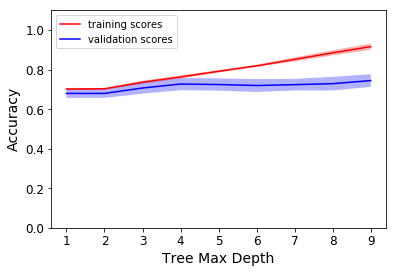

In [74]:
depths = np.arange(1, 10)
val_train, val_test = validation_curve(DecisionTreeClassifier(), X, y,
                                       'max_depth', depths, cv=10)
def plot_with_depth(depths, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(depths, mu, '-', **kwargs)
    plt.fill_between(depths, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.3)

plot_with_depth(depths, val_train, label='training scores', color = 'r')
plot_with_depth(depths, val_test, label='validation scores', color = 'b')
plt.ylim(0, 1.1)
plt.xlabel('Tree Max Depth'); plt.ylabel('Accuracy')
plt.legend();

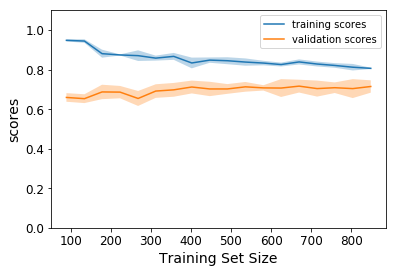

In [38]:
def plot_with_size(sizes, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(sizes, mu, '-', **kwargs)
    plt.fill_between(sizes, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.3)

def plot_learning_curve():
    train_sizes = np.linspace(0.1, 0.95, 18)
    N_train, val_train, val_test = learning_curve(DecisionTreeClassifier(max_depth=5),
                                                  X_train, y_train, train_sizes=train_sizes, cv=5)
    plot_with_size(N_train, val_train, label='training scores')
    plot_with_size(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('scores')
    plt.ylim(0, 1.1)
    #plt.xlim(5, 800)
    plt.legend()
    
plot_learning_curve()

[[ 0.70581655  0.69608939  0.7027933   0.68080357  0.703125  ]
 [ 0.7360179   0.71955307  0.7027933   0.71763393  0.7265625 ]
 [ 0.75615213  0.75083799  0.71955307  0.73772321  0.7578125 ]
 [ 0.77852349  0.75977654  0.75642458  0.76116071  0.77566964]
 [ 0.81319911  0.80223464  0.78212291  0.79241071  0.81026786]
 [ 0.85346756  0.82346369  0.82346369  0.84040179  0.82477679]
 [ 0.87919463  0.85921788  0.8547486   0.875       0.84598214]
 [ 0.91834452  0.89608939  0.87374302  0.89955357  0.87946429]
 [ 0.94854586  0.92849162  0.90391061  0.92410714  0.90848214]]


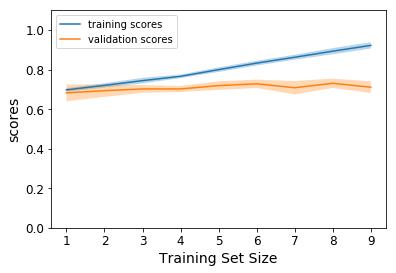

In [72]:
def plot_complexity_curve():
    #train_sizes = np.linspace(0.1, 0.95, 18)
    param_name="max_depth"
    param_range=range(1,10)
    val_train, val_test = validation_curve(DecisionTreeClassifier(),
                                                  X_train, y_train, param_name=param_name, param_range=param_range, cv=5)
    print (val_train)
    plot_with_size(param_range, val_train, label='training scores')
    plot_with_size(param_range, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('scores')
    plt.ylim(0, 1.1)
    #plt.xlim(5, 800)
    plt.legend()
    
plot_complexity_curve()

In [96]:
# def plot_learning_curve():
#     train_sizes = np.linspace(0.05, 1, 20)
#     N_train, val_train, val_test = learning_curve(DecisionTreeClassifier(max_depth=2),
#                                                   X, y, train_sizes, cv=7)
#     plot_with_size(N_train, val_train, label='training scores')
#     plot_with_size(N_train, val_test, label='validation scores')
#     plt.xlabel('Training Set Size'); plt.ylabel('scores')
#     plt.ylim(0, 1.1)
#     #plt.xlim(5, 80)
#     plt.legend()
    
# plot_learning_curve()

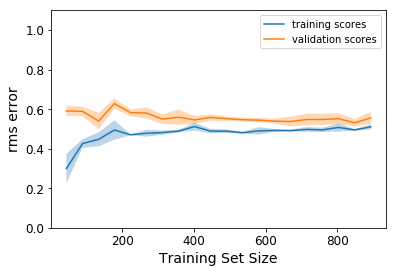

In [39]:
def rms_error(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(np.mean((y - y_pred) ** 2))

# degree = np.arange(0, 18)
# val_train, val_test = validation_curve(DecisionTreeClassifier(max_depth=2), X_train, y_train,
#                                        'max_depth', depths, cv=10,
#                                        scoring=rms_error)

def plot_learning_curve():
    train_sizes = np.linspace(0.05, 1, 20)
    N_train, val_train, val_test = learning_curve(DecisionTreeClassifier(max_depth=3),
                                                  X_train, y_train, train_sizes=train_sizes, cv=5, 
                                                 scoring=rms_error)
    plot_with_size(N_train, val_train, label='training scores')
    plot_with_size(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('rms error')
    plt.ylim(0, 1.1)
    #plt.xlim(5, 80)
    plt.legend()
    
plot_learning_curve()

# MLPClassifier

In [43]:
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                        hidden_layer_sizes=(10, 10), random_state=1)
mlp_clf.fit(X_train, y_train)
mlp_clf.score(X_test, y_test)

0.71458333333333335

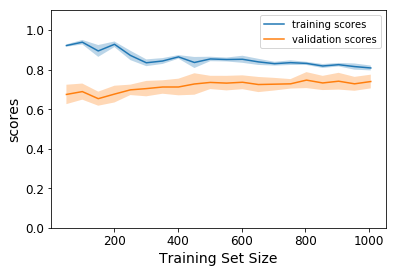

In [44]:
def plot_learning_curve():
    train_sizes = np.linspace(0.05, 1, 20) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(MLPClassifier(solver='lbfgs', alpha=1e-5, 
                        hidden_layer_sizes=(5, 5), random_state=1),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_with_size(N_train, val_train, label='training scores')
    plot_with_size(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('scores')
    plt.ylim(0, 1.1)
    #plt.xlim(5, 80)
    plt.legend()
    
plot_learning_curve()

# AdaBoostClassifier

In [64]:
bdt_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=1000,
    learning_rate=1,
    algorithm="SAMME")
bdt_clf.fit(X_train, y_train)
bdt_clf.score(X_test, y_test)

0.79166666666666663

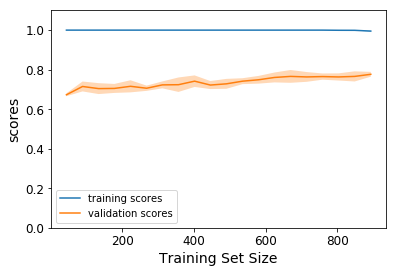

In [65]:
def plot_learning_curve():
    train_sizes = np.linspace(0.05, 1, 20) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                                                     n_estimators=1000,learning_rate=1,algorithm="SAMME"),
                                                  X_train, y_train, train_sizes=train_sizes, cv=5)
    plot_with_size(N_train, val_train, label='training scores')
    plot_with_size(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('scores')
    plt.ylim(0, 1.1)
    #plt.xlim(5, 80)
    plt.legend()
    
plot_learning_curve()

# SVC

In [ ]:
# svm_clf = SVC(kernel='linear', C=1E10)
# svm_clf.fit(X, y)

In [49]:
# svm_clf = SVC(kernel='linear', C=1E10)
svm_clf = SVC(kernel='linear')

svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.73958333333333337

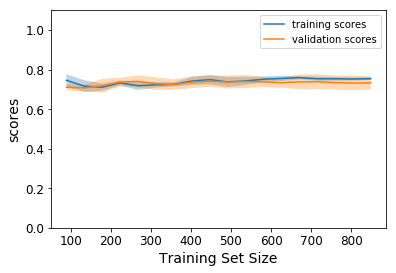

In [50]:
def plot_learning_curve():
    train_sizes = np.linspace(0.1, 0.95, 18) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(SVC(kernel= 'linear'),
                                                  X_train, y_train, train_sizes=train_sizes, cv=5)
    plot_with_size(N_train, val_train, label='training scores')
    plot_with_size(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('scores')
    plt.ylim(0, 1.1)
    #plt.xlim(5, 80)
    plt.legend()
    
plot_learning_curve()

# KNN

In [51]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.70833333333333337

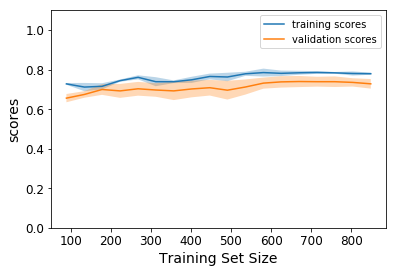

In [52]:

def plot_learning_curve():
    train_sizes = np.linspace(0.1, 0.95, 18) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(KNeighborsClassifier(n_neighbors=10),
                                                  X_train, y_train, train_sizes=train_sizes, cv=5)
    plot_with_size(N_train, val_train, label='training scores')
    plot_with_size(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('scores')
    plt.ylim(0, 1.1)
    #plt.xlim(5, 80)
    plt.legend()
    
plot_learning_curve()

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  

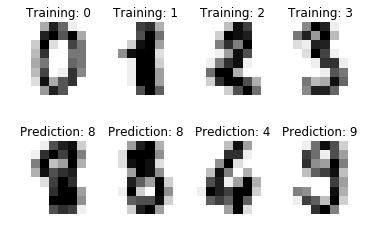

In [22]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [26]:
images_and_labels

[(array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
         [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
         [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
         [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
         [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
         [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
         [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
         [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]]), 0),
 (array([[  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,   9.,   0.,   0.],
         [  0.,   0.,   3.,  15.,  16.,   6.,   0.,   0.],
         [  0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   3.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   1.,  16.,  16.,   6.,   0.,   0.],
         [  0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]]), 1),
 (array([[  0.,   0.,   0.,   4.,  15.,  12.

In [25]:
digits.data.shape

(1797, 64)

In [27]:
data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [28]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [32]:
dt_clf = DecisionTreeClassifier(max_depth = 5)
dt_clf.fit(data, digits.target)
dt_clf.score(data, digits.target)

0.70728992765720644

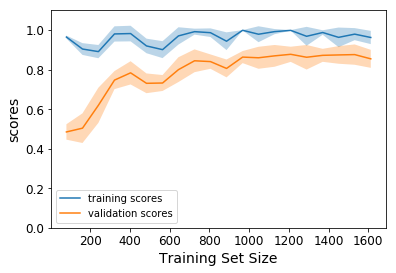

In [31]:
def plot_learning_curve():
    train_sizes = np.linspace(0.05, 1, 20) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(MLPClassifier(solver='lbfgs', alpha=1e-5, 
                        hidden_layer_sizes=(10, 20, 10), random_state=1),
                                                  data, digits.target, train_sizes=train_sizes, cv=10)
    plot_with_size(N_train, val_train, label='training scores')
    plot_with_size(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('scores')
    plt.ylim(0, 1.1)
    #plt.xlim(5, 80)
    plt.legend()
    
plot_learning_curve()